In [1]:
import pickle
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit import  QuantumCircuit, transpile
import random

In [2]:
n_qubits = 5

baseline_dirs = [f'{n_qubits}', f'{n_qubits}_app',]
quct_dirs = [f'{n_qubits}_test/result', '5_app/result']
n_neighbors = 7

In [3]:
# n_qubits = 4

# baseline_dirs = [f'{n_qubits}', ]
# quct_dirs = [f'5_app/result',]
# n_neighbors = 10 # 后面加到判断里面

In [4]:
linear = False

In [5]:
baseline_results = []

dir_files = []

for baseline_dir in baseline_dirs:
    for dirpath, dirnames, filenames in os.walk(baseline_dir):
        for filename in filenames:
            if 'json' not in filename or 'pkl' in filename:
                continue

            # if (linear and 'linear' not in filename) or (not linear and 'linear' in filename):
            #     continue

            print(filename)
            with open(os.path.join(dirpath, filename), mode='r') as f:
                result_dict = json.load(f)
            baseline_results.append(result_dict)


for result_dict in baseline_results:
    picked_unitary = json.loads(result_dict['Unitary']).encode('latin-1')
    U = pickle.loads(picked_unitary)
    result_dict['U'] = U

linear_random-5-5.json
random-5-7.json
random-5-8.json
random-5-5.json
func-random-5-1.json
random-5-6.json
random-5-0.json
linear_random-5-2.json
linear_random-5-4.json
random-5-2.json
linear_random-5-3.json
random-5-4.json
random-5-9.json
random-5-1.json
func-random-5-0.json
linear_random-5-0.json
random-5-3.json
linear_random-5-1.json
linear-random-5-3.json
linear_random-5-8.json
linear_random-5-4.json
linear-random-5-1.json
linear-random-5-2.json


In [6]:
baseline_results[0].keys(), baseline_results[0]['Metrics'][0].keys()

(dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
 dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))

In [7]:
synthesized_filenames = []
results = []

for quct_dir in quct_dirs:
    for dirpath, dirnames, filenames in os.walk(quct_dir):
        for filename in filenames:
            if 'pkl' not in filename or f'-{n_qubits}-' not in filename:  # 'change_func' not in filename or
                continue
            
            # if (linear and 'linear' not in filename) or (not linear and 'linear' in filename):
            #     continue

            print(filename)
            with open(os.path.join(dirpath, filename), mode='rb') as f:
                result_dict = pickle.load(f)
            
            result_dict['baseline_name'] =  filename.split('_')[2]
            results.append(result_dict)
        

True_5_func-random-5-1.json_2_7.pkl


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


True_5_func-random-5-0.json_2_7.pkl
True_5_random-5-0.json_2_10.pkl
True_5_linear_random-5-5.json_2_7.pkl
True_5_random-5-6.json_2_7.pkl
True_5_linear_random-5-0.json_2_7.pkl
True_5_linear_random-5-1.json_2_7.pkl
True_5_random-5-0.json_2_1.pkl
True_5_linear_random-5-4.json_2_7.pkl
True_5_random-5-5.json_2_7.pkl
True_5_random-5-1.json_2_1.pkl
True_5_random-5-8.json_2_7.pkl
True_5_linear_random-5-3.json_2_7.pkl
True_5_random-5-3.json_2_7.pkl
True_5_random-5-1.json_2_4.pkl
True_5_random-5-1.json_2_7.pkl
True_5_random-5-0.json_2_7.pkl
True_5_random-5-1.json_2_19.pkl
True_5_random-5-0.json_2_16.pkl
True_5_random-5-2.json_2_7.pkl
True_5_random-5-1.json_2_16.pkl
True_5_linear_random-5-2.json_2_7.pkl
True_5_random-5-4.json_2_7.pkl
True_5_random-5-7.json_2_7.pkl
True_5_random-5-1.json_2_10.pkl
True_5_random-5-0.json_2_13.pkl
True_5_random-5-1.json_2_13.pkl
True_5_random-5-0.json_2_19.pkl
True_5_random-5-0.json_2_4.pkl
True_5_random-5-9.json_2_7.pkl
True_5_linear_random-5-8.json_2_7.pkl
True_5_l

In [8]:
results[0].keys()

dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time', 'baseline_name'])

In [9]:
merge_results = []
for quct_result in results:
    print(quct_result['baseline_name'])
    U = quct_result['U']

    corr_baseline_result = None
    for baseline_result in baseline_results:
        # print(baseline_result['U'].shape[0],  2**n_qubits, U.shape)
        if baseline_result['U'].shape[0] ==  2**n_qubits and np.allclose(U, baseline_result['U']):
            corr_baseline_result = baseline_result
            break
    
    if corr_baseline_result is None:
        print('don find')
        continue

    merge_result = {
        'U': U,
        'filename': quct_result['baseline_name'],
        'cpu_time': {},
        'time': {},
        '#two-qubit': {},
        '#gate': {},
        'depth': {},
    }

    # dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 
    # 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

    merge_result['#two-qubit']['quct'] = quct_result['#two-qubit gate']
    merge_result['time']['quct'] = quct_result['synthesis_time']
    merge_result['#gate']['quct'] = quct_result['#gate']
    merge_result['depth']['quct'] = quct_result['depth']
    merge_result['cpu_time']['quct'] = quct_result['cpu time']

    # (dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
    # dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))
        # baseline_name = metric['Synthesiser']
    for metric in corr_baseline_result['Metrics']:
        baseline_name = metric['Synthesiser'].replace(' Synthesiser', '').replace(' synthesiser', '')
        # print(baseline_name, metric)
        # print(metric.keys(), baseline_name)
        qiskit_circuit = QuantumCircuit.from_qasm_str(metric['Circuit'])
        if 'QFast' in baseline_name:
            qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'])
        else:
            qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'], coupling_map=[[start, start+1] for start in range(n_qubits)])

        merge_result['#two-qubit'][baseline_name] = metric['CNOT Count']
        merge_result['time'][baseline_name] = metric['Execution Time']
        merge_result['#gate'][baseline_name] = len(qiskit_circuit)#metric['gate_num']
        merge_result['depth'][baseline_name] = qiskit_circuit.depth()

        '''为什么会有没有的'''
        merge_result['cpu_time'][baseline_name] = metric.get('CPU time', metric['Execution Time'] )
        if 'QFast' in baseline_name:
            merge_result['cpu_time'][baseline_name] *= 7
            if n_qubits == 4:
                merge_result['cpu_time'][baseline_name] *= 7
                merge_result['time'][baseline_name] *= 7
    
    merge_results.append(merge_result)
    

func-random-5-1.json
func-random-5-0.json
random-5-0.json
linear
random-5-6.json
linear
linear
random-5-0.json
linear
random-5-5.json
random-5-1.json
random-5-8.json
linear
random-5-3.json
random-5-1.json
random-5-1.json
random-5-0.json
random-5-1.json
random-5-0.json
random-5-2.json
random-5-1.json
linear
random-5-4.json
random-5-7.json
random-5-1.json
random-5-0.json
random-5-1.json
random-5-0.json
random-5-0.json
random-5-9.json
linear
linear
linear-random-5-2.json
linear-random-5-3.json
linear-random-5-1.json


In [10]:
merge_results[0]

{'U': array([[ 0.00120744-0.06126085j, -0.26161897-0.12602386j,
          0.11327151-0.1208506j , ..., -0.17980585+0.06105929j,
          0.10839794+0.11289679j, -0.00079722+0.06319132j],
        [-0.13876515-0.06493136j, -0.12682848-0.07206185j,
          0.26421666-0.13139787j, ..., -0.11268695-0.12980901j,
         -0.08964394-0.2143695j , -0.02359864+0.1101426j ],
        [-0.03803936+0.20870256j,  0.26436984-0.04617295j,
          0.0435735 -0.0851333j , ...,  0.17529414+0.05107569j,
          0.03122726+0.05658514j, -0.06113915+0.07719902j],
        ...,
        [ 0.17840572+0.08300191j, -0.01284111+0.01773977j,
         -0.05816687+0.00626465j, ..., -0.15474532-0.12570322j,
         -0.08728835+0.0099666j ,  0.09791562+0.12927826j],
        [-0.07197052+0.14633665j, -0.04262288-0.04964156j,
         -0.05835762-0.00425908j, ..., -0.098476  +0.09618527j,
          0.01848873-0.13542973j,  0.02637851-0.18230623j],
        [ 0.03989537+0.00480654j,  0.06648959+0.10163898j,
        

In [11]:
all_result_df_data = []
evaluated_baselines = []

syn_index = {
    'quct': 0,
    'QFast': 1,
    # 'DNN': 2,
    'Qiskit': 3,
    'QSD': 4,
    # 'CSD': 4,
} # 用来让作图的顺序固定的

for merge_result in merge_results:
    for prop_name in merge_result:
        if prop_name in ('U', 'filename'):
            continue
        for synthesizer, prop_value in merge_result[prop_name].items():
            if synthesizer not in syn_index:
                continue

            all_result_df_data.append([synthesizer, prop_name, prop_value])


if n_qubits == 4:
    for i in range(10):
        all_result_df_data.append(['DNN', 'cpu_time', 169*60*60*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', 'time', 169*60*60*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', '#two-qubit', 90*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', '#gate', 500*(random.random()*.5+.8)])
        all_result_df_data.append(['DNN', 'depth', 150*(random.random()*.5+.8)])


all_result_df_data.sort(key = lambda elm: syn_index[elm[0]])

len(all_result_df_data)
all_result_df = pd.DataFrame(all_result_df_data, columns=['synthesizer', 'property', 'value'])
all_result_df


,synthesizer,property,value
0,quct,cpu_time,28882.525332
1,quct,time,9540.003123
2,quct,#two-qubit,251.000000
3,quct,#gate,758.000000
4,quct,depth,405.000000
...,...,...,...
615,QSD,cpu_time,2.026816
616,QSD,time,2.026816
617,QSD,#two-qubit,528.000000
618,QSD,#gate,3811.000000


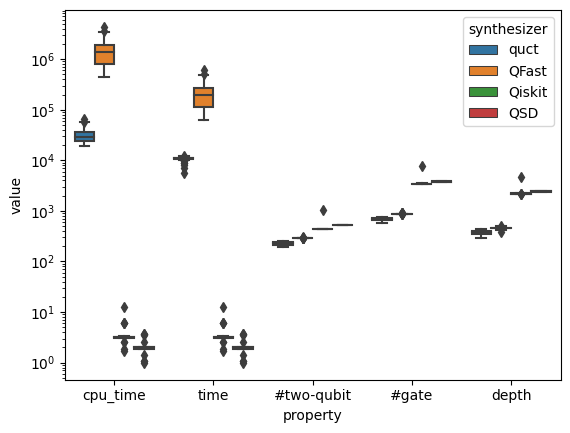

In [12]:
ax = sns.boxplot(x="property", y="value", hue="synthesizer", data=all_result_df)  # RUN PLOT  
ax.set_yscale('log')

In [13]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    prop_df = all_result_df[all_result_df['property'] == prop_name]

    qfast_df =  np.array(prop_df[prop_df['synthesizer'] == 'QFast']['value'])
    quct =  np.array(prop_df[prop_df['synthesizer'] == 'quct']['value'])

    quct = quct[:len(qfast_df)]
    print(prop_name, float(qfast_df.mean() / quct.mean()),  float(quct.mean() / qfast_df.mean()))
    # print(prop_name, float((qfast_df / quct).mean()),  float( (quct / qfast_df).mean()))

'''似乎还会有qfast没有quct有的'''

#two-qubit 1.291844416562108 0.7740870240870241
time 20.660540491901315 0.04840144430839009
#gate 1.2897238945401703 0.7753597527605189
depth 1.2320117474302494 0.8116805721096544
cpu_time 46.143613640769416 0.021671471328298112


'似乎还会有qfast没有quct有的'

In [14]:
for syn in syn_index:
    if syn == 'DNN':
        continue
    for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
        prop_df = all_result_df[all_result_df['property'] == prop_name]
        # print(syn, prop_name, prop_df[prop_df['synthesizer'] == syn].mean())
        print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))

quct #two-qubit 227.71428571428572
quct time 10609.546007313047
quct #gate 688.1428571428571
quct depth 369.6857142857143
quct cpu_time 33255.10058053497
QFast #two-qubit 294.1714285714286
QFast time 219198.95488478115
QFast #gate 887.5142857142857
QFast depth 455.45714285714286
QFast cpu_time 1534510.5127731324
Qiskit #two-qubit 465.51851851851853
Qiskit time 3.6858399090943514
Qiskit #gate 3600.925925925926
Qiskit depth 2285.5925925925926
Qiskit cpu_time 3.6858399090943514
QSD #two-qubit 528.0
QSD time 2.0494971805148654
QSD #gate 3815.814814814815
QSD depth 2427.4074074074074
QSD cpu_time 2.0494971805148654


/tmp/ipykernel_2856677/4042622715.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))


In [15]:
iter_counts = []
second_per_iters = []
for quct_result in results:
    iter_counts.append(quct_result['iter_count'])
    second_per_iters.append(quct_result['cpu time']/quct_result['iter_count'])
sum(iter_counts) / len(iter_counts), sum(second_per_iters) / len(iter_counts)

(43.77142857142857, 866.045595240245)

In [16]:
# 全连接的
# #two-qubit 1.3036968576709798 0.7670494824897206
# time 25.544074876468155 0.03914802179511403
# #gate 1.3014678899082568 0.7683631749612294
# depth 1.2660738714090287 0.7898433279308482
# cpu_time 52.435186880049756 0.01907116307771708

In [17]:
len(quct)

35

In [18]:
len(qfast_df)

35

In [19]:
qfast_df =  prop_df[prop_df['synthesizer'] == 'QFast']
qfast_df.mean()

/tmp/ipykernel_2856677/569752527.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  qfast_df.mean()


value    1.534511e+06
dtype: float64

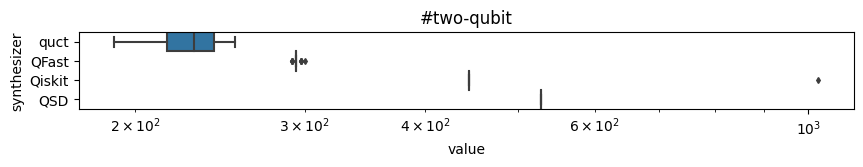

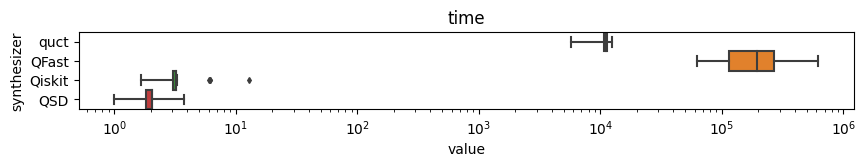

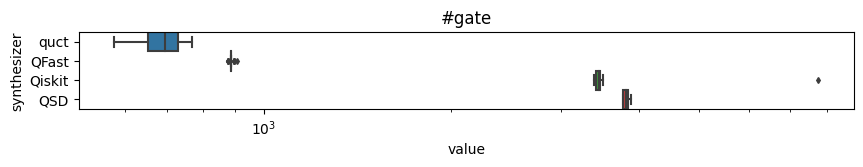

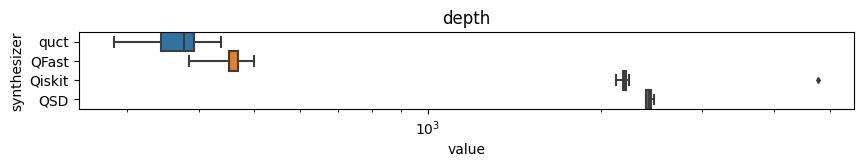

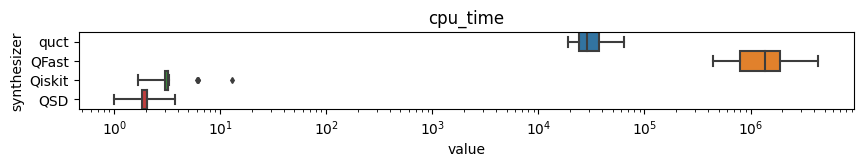

In [20]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    fig, ax = plt.subplots(figsize =(10, 1))

    plot_data = all_result_df[all_result_df['property'] == prop_name]
    ax = sns.boxplot(x="value", y="synthesizer", data=plot_data, fliersize=3, width =1, whis=10)  # RUN PLOT
    plt.title(prop_name)
    ax.set_xscale('log')
    fig.show()
    fig.savefig(f'synthesis_evaluation_fig/qubit{n_qubits}_{prop_name}_{"linear" if linear else ""}.svg')

   Trial Number     value
0      1      1 -0.750615
1      1      1 -1.715070
2      1      1 -0.963404
3      1      1  0.360856
4      1      1 -1.190504


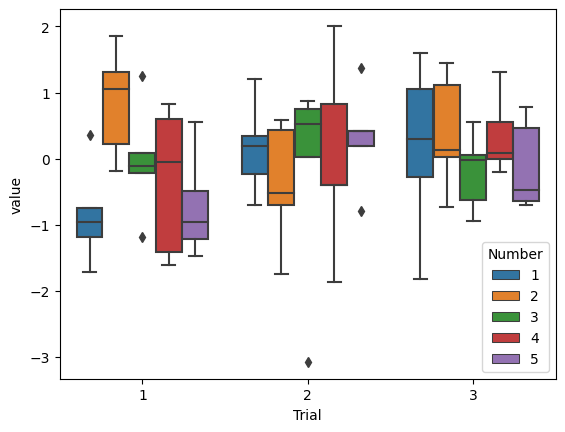

In [ ]:
np.random.seed(44)
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=3)

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT  
plt.show()

plt.clf()
plt.close()